# Stroke prediction using RandomForestClassifier¶

# problem statement
    The objective is to predict based on diagnostic measurements whether a patient has stroke.

# Dataset
    gender
    age
    hypertension
    heart_disease
    ever_married
    work_type
    Residence_type
    avg_glucose_level
    bmi
    smoking_status
      

# Target variable explanation
    The target variable outcome consist of 0 and 1 where 0
     represents that one has no stroke(tested negative) while 1 shows one has stroke(tested positive)

# Tools preparation
    pandas and numpy for data analysis and exploration

    seaborn and matplotlib fot data visualization

    RandomForestClassifier for building a model

    accuracy score for metrics purposes

# Loading libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno visualizing missing data in pandas DataFrames
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading data

In [ ]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Checking total number of rows and columns

In [ ]:
data.shape

(5110, 12)

# checking for duplicates

In [ ]:
data.duplicated().sum()

0

# checking for null values

In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data analysis

# Dropping ID Column

In [ ]:

data=data.drop(['id'],axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Filling Missing value with Mean

In [ ]:

data['bmi'].fillna(data['bmi'].mean(),inplace=True)
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data['work_type'].nunique()

5

# MAPPING OF CATEGORICAL VARIABLES

In [ ]:


data['work_type']= data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [ ]:
data['work_type'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: work_type, dtype: float64

# Coverting into numericals ie 0 and 1

In [ ]:

data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [ ]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,NaN,0,228.69,36.600000,0,1
1,1.0,61.0,0,0,0,NaN,1,202.21,28.893237,1,1
2,0.0,80.0,0,1,0,NaN,1,105.92,32.500000,1,1
3,1.0,49.0,0,0,0,NaN,0,171.23,34.400000,2,1
4,1.0,79.0,1,0,0,NaN,1,174.12,24.000000,1,1


# Data visualization using seaborn,matplotlib,pandas

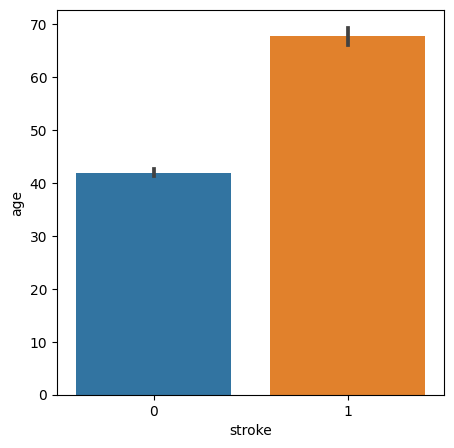

In [ ]:
#the aged pepole are more affaected by stroke
plot=plt.figure(figsize=(5,5))
sns.barplot(x="stroke",y="age",data=data);

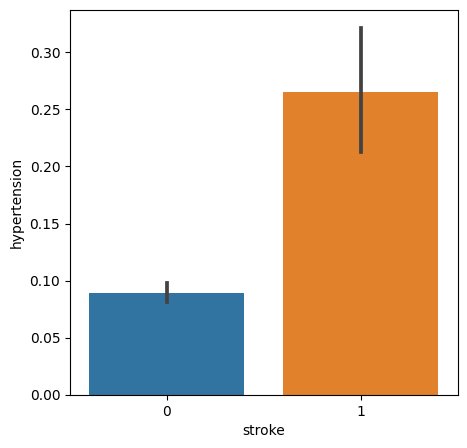

In [ ]:
#more analysis for more understanding
#people who have STROKE are likely to have bloodpressure
plot=plt.figure(figsize=(5,5))
sns.barplot(x="stroke",y="hypertension",data=data);

# Correlation

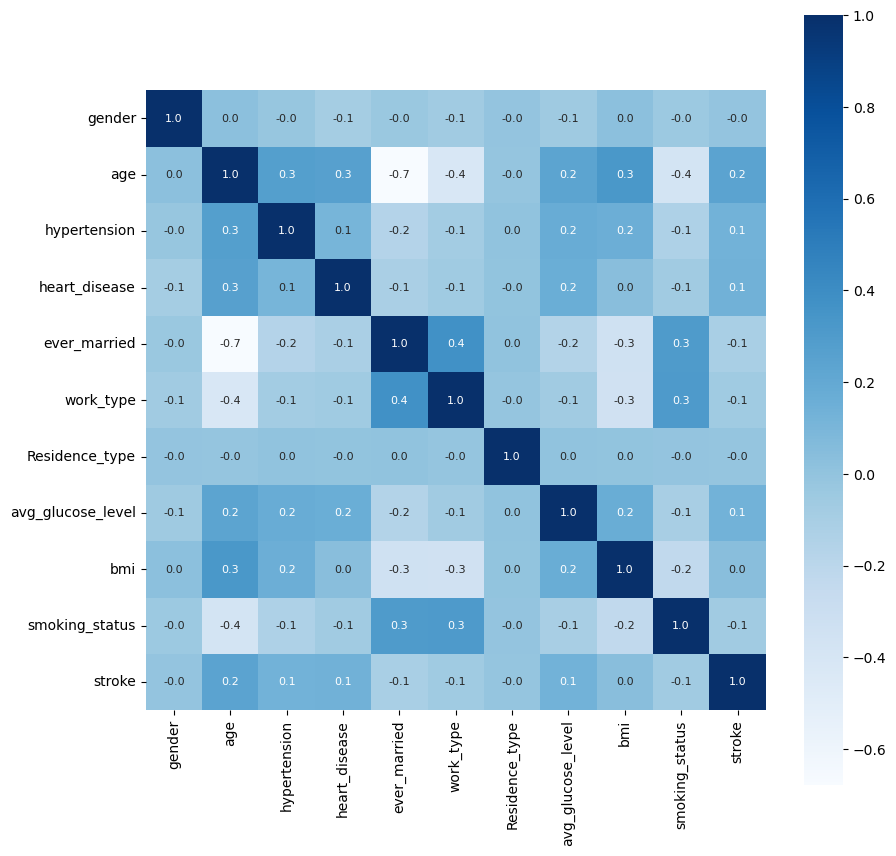

In [ ]:

correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8},cmap='Blues');

# Splitting tha dataset

In [ ]:
#splitting data
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

In [ ]:
X.isnull().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

# converting gender

In [ ]:

X.gender=(X.gender.fillna(1))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1620\3773556973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.gender=(X.gender.fillna(1))


# Treating Imbalance Data using SMOTE  (Synthetic Minority Oversampling Technique)
    Oversampling is a technique used to balance imbalanced datasets,
    where the majority class has significantly more samples than the minority class.
    SMOTE works by creating synthetic samples of the minority class,
    effectively increasing its representation in the dataset.

In [ ]:
pip install imblearn

In [ ]:


from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,y)

In [ ]:
X_test = X_test.dropna()
y_pred = rf_classifier.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
5011,54.000000,0,0,0,0,76.040000,29.500000,1.000000,0,2
6550,75.671275,0,0,0,0,199.643041,28.139392,1.000000,0,2
7395,56.340075,0,0,0,1,249.061259,35.564377,0.024291,0,1
847,44.000000,0,0,0,0,58.470000,24.400000,0.000000,0,1
938,23.000000,0,0,1,1,92.870000,30.100000,1.000000,0,1


In [ ]:
y_train.head()

,stroke
5011,0
6550,1
7395,1
847,0
938,0


In [ ]:
# Rescaling Data
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.05260466, -0.31325465, -0.23176063, ...,  0.94664538,
        -0.61776772,  0.70427363],
       [ 0.92956588, -0.31325465, -0.23176063, ...,  0.94664538,
        -0.61776772,  0.70427363],
       [ 0.05345061, -0.31325465, -0.23176063, ..., -1.18463129,
        -0.61776772, -0.25074077],
       ...,
       [ 0.78379281, -0.31325465, -0.23176063, ..., -0.04687603,
        -0.61776772, -0.25074077],
       [-0.41517513, -0.31325465, -0.23176063, ...,  0.94664538,
        -0.61776772,  0.70427363],
       [ 1.15486533, -0.31325465, -0.23176063, ..., -1.23769116,
        -0.61776772, -1.20575516]])

In [ ]:
X_test

array([[ 0.08335927, -0.31325465,  4.31479662, ..., -1.23769116,
        -0.61776772, -1.20575516],
       [-1.59352918, -0.31325465, -0.23176063, ...,  0.94664538,
        -0.61776772,  1.65928802],
       [-1.36692263, -0.31325465, -0.23176063, ..., -1.23769116,
        -0.61776772,  0.70427363],
       ...,
       [-0.41082267, -0.31325465, -0.23176063, ..., -0.75886901,
        -0.61776772, -1.20575516],
       [ 1.03510677, -0.31325465, -0.23176063, ..., -1.23769116,
         0.47439329,  0.70427363],
       [-1.00435215, -0.31325465, -0.23176063, ..., -1.23769116,
        -0.61776772, -0.25074077]])

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred=LR.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report

In [ ]:
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       803
           1       0.79      0.85      0.82       802

    accuracy                           0.81      1605
   macro avg       0.82      0.81      0.81      1605
weighted avg       0.82      0.81      0.81      1605



In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8149761027071176

# Model training: using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

<ipython-input-111-0f57dea4b83f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
RF_pred=RF.predict(X_test)
roc_auc_score(y_test, RF_pred)

0.9414298935103089

In [ ]:
cm = confusion_matrix(y_test, RF_pred)
cm

array([[760,  43],
       [ 51, 751]])

In [ ]:
predicted_probab = RF.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

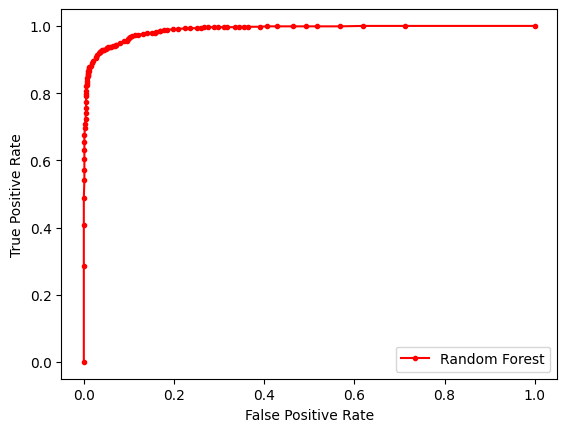

In [ ]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='red', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()